(liven:head)=
# Using Live Code

```{include} live.md
```

In [1]:
# make sure scipy is available in thebe: numpy and matplotlib available by default
%pip install scipy

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


Note: you may need to restart the kernel to use updated packages.


In [2]:
%%writefile glcd.py

# gcdp.py: code to solve GL BVP and plot psi and b.
# %%writefile saves module in Thebe environment for use on other pages.

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def nat(x,h): # natural BC with applied magnetizing field h
  def BC(Y):
    return [Y[1],Y[3]-h]
  return (x,BC)

def nrm(x,r,h): # normal metal BC with parameter r.
  def BC(Y):
    return [Y[1]-r*Y[0],Y[3]-h]
  return (x,BC)

def SC(x): # superconducting psi=1,b proportional to exp(-x), for x going to +infinity.
  def BC(Y):
    return [Y[1],Y[3]+Y[2]]
  return (x,BC)

def gl1D(kappa,A,B):
  xa,AB=A
  xb,BB=B
  nodes=5
  def dY(x,Y): # Y=[f,df,a,b=da]
    f,df,a,b = Y
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),b,a*f**2))
  def bc(Ya, Yb):
    return np.array(AB(Ya)+BB(Yb))
  rng=[xa, xb]
  X = np.linspace(*rng, nodes)
  Y0=[1 if x<0 else 1 for x in X]
  Y = np.vstack([Y0,np.zeros((3, X.size))])
  return solve_bvp(dY, bc, X, Y)

def plotn(sol,n,tex=""):
  x_plot = np.linspace(sol.x[0],sol.x[-1], 40)
  y_plot = sol.sol(x_plot)[n] # plot index n of solution
  plt.plot(x_plot, y_plot,label=f"${tex}$")

def plt1D(kappa,A,B,tex):
  sol=gl1D(kappa,A,B)
  plotn(sol,0,f"\psi: {tex}") # psi=f
  plotn(sol,3,f"b: {tex}") # b=da
  if not sol.success:
    print(f"kappa={kappa},tex={tex}:",sol.message)

def glradial(kappa,n,a,b):
  nodes=5
  def dY(x,Y): # Y=[f,df,a,b=da]
    f,df,a,da = Y
    b=da+a/x
    ank=a+n/kappa/x
    return np.vstack((df, kappa*kappa*f*(f**2+ank**2-1)-df/x,da,a/x/x+ank*f**2-da/x))
  def bc(Ya, Yb):
    return np.array([a*Ya[1]-Ya[0], Yb[0]-1, a*Ya[3]-Ya[2],Yb[3]+Yb[2]/b])
  rng=[a, b]
  x = np.linspace(*rng, nodes)
  Y = np.zeros((4, x.size))
  for k in range(x.size): # initialize f to 1
    Y[0,k]=1
  return solve_bvp(dY, bc, x, Y)

def glrplot(kappa,n,a,b,tex):
  sol=glradial(kappa,n,a,b)
  r_plot = np.linspace(a,b, 100)
  plots=sol.sol(r_plot)
  f=plots[0] # f
  plt.subplot(1, 2, 1)
  plt.plot(r_plot, f,label=f"$f: {tex}$")
  plt.subplot(1, 2, 2)
  b = plots[3]+plots[2]/r_plot # b=da+a/x
  plt.plot(r_plot, b,label=f"$b: {tex}$")
  return 0

Overwriting glcd.py


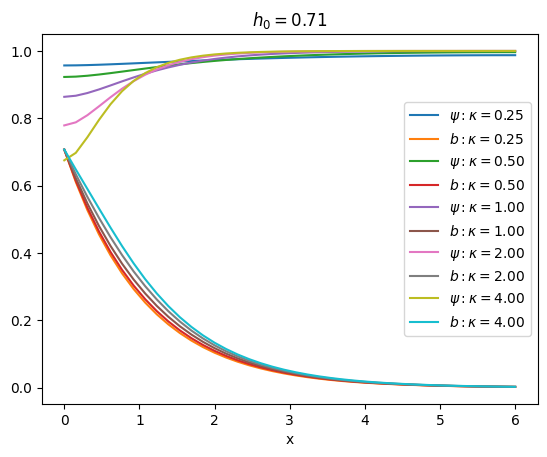

In [3]:
import matplotlib.pyplot as plt
from glcd import plt1D,nat,SC

# basic usage vacuum boundary at $x=0$. As published the applied field is critical.

hc=1/2**(1/2)
for k in range(-2,3):
  kappa=2**k
  plt1D(kappa,nat(0,hc),SC(6),f"\kappa={kappa:.2f}") # natural boundary x=0,superconducting at x=6 (x 'large')
plt.xlabel("x")
plt.title(f"$h_0={hc:.2f}$")
plt.legend()
plt.show()


In [4]:
# some code to check usage of glcd.py

from glob import glob

exclude=["imports.ipynb","liven.ipynb"]
ilst=[]
for fn in glob("*.ipynb"):
  if not fn in exclude:
    with open(fn, "rt") as rf:
      for line in rf:
        if "glcd" in line:
          flst=line.replace(" ","")[15:-5].split(",")
          #print(fn,":",flst)
          ilst+=flst
      
iset=set(ilst)
print("Used:",iset)
dglcd=[]

with open("glcd.py","rt") as rf:
  for line in rf:
    if "def"==line[:3]:
      dglcd+=[line[4:].split("(")[0]]
print("Defined:",dglcd)

for d in dglcd:
  if not d in iset:
    print("Not used:",d)

Used: {'plotn', 'SC', 'glrplot', 'gl1D', 'plt1D', 'nat', 'nrm'}
Defined: ['nat', 'nrm', 'SC', 'gl1D', 'plotn', 'plt1D', 'glradial', 'glrplot']
Not used: glradial
